In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv('data_raw_1.csv')
data.head()

,record,Province,City,District,Tier,region,RS3,Age,RS4,RS6r1,...,L2r14,L2r15,L2r16,L2r17,L2r18,L2r19,L2r99,L2r100,G5,G7
0,5,1,1,10,1,4,31,3,1,1,...,,0,,,,,,1,3,34
1,2,1,1,13,1,4,28,12,1,1,...,0,1,,,,,,0,4,33
2,29,10,77,741,2,1,43,14,1,1,...,1,,,,,,,0,3,33
3,3,9,75,722,1,1,44,14,1,1,...,,1,,1,,,,0,3,35
4,20,9,75,729,1,1,24,12,2,1,...,,,,,,,,0,4,35


In [7]:
columns = '''B2r7c1
B2r37c1
B2r31c1
B2r42c1
B1r1c1
B1r5c1
B1r33c1
B1r34c1
B1r35c1
B1r36c1
B2r21c1
B2r13c1
B1r16c1
B1r23c1
B1r25c1
B1r38c1
B2r40c1
B2r8c1
B2r20c1
B1r29c1
B1r43c1
B1r44c1
B1r45c1
B2r46c1
B2r47c1'''

columns.split('\n')

['B2r7c1',
 'B2r37c1',
 'B2r31c1',
 'B2r42c1',
 'B1r1c1',
 'B1r5c1',
 'B1r33c1',
 'B1r34c1',
 'B1r35c1',
 'B1r36c1',
 'B2r21c1',
 'B2r13c1',
 'B1r16c1',
 'B1r23c1',
 'B1r25c1',
 'B1r38c1',
 'B2r40c1',
 'B2r8c1',
 'B2r20c1',
 'B1r29c1',
 'B1r43c1',
 'B1r44c1',
 'B1r45c1',
 'B2r46c1',
 'B2r47c1']

In [22]:
data_sel = data[columns.split('\n')]
data_sel = data_sel.apply(lambda x:x.replace(' ', None))
print(data_sel.shape)
data_sel.head()

(1500, 25)


,B2r7c1,B2r37c1,B2r31c1,B2r42c1,B1r1c1,B1r5c1,B1r33c1,B1r34c1,B1r35c1,B1r36c1,...,B1r38c1,B2r40c1,B2r8c1,B2r20c1,B1r29c1,B1r43c1,B1r44c1,B1r45c1,B2r46c1,B2r47c1
0,1,1,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
3,1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,1,1,1,0,1,1
4,1,1,1,1,1,0,1,1,0,1,...,0,0,0,0,1,1,1,0,1,1


In [19]:
data_sel[data_sel['B2r7c1'].isnull()].shape

(0, 25)

In [23]:
for i in data_sel.columns:
    d=len(data_sel)-data_sel[i].count()
    r=(d/len(data_sel))*100
    rate='%.2f%%' % r
    print('字段名为：',str(i).ljust(10),'缺失值数量:',str(d).ljust(4),'缺失数量占比：',rate) 

字段名为： B2r7c1     缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r37c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r31c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r42c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r1c1     缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r5c1     缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r33c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r34c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r35c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r36c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r21c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r13c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r16c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r23c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r25c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r38c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r40c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r8c1     缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r20c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r29c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r43c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r44c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B1r45c1    缺失值数量: 0    缺失数量占比： 0.00%
字段名为： B2r46

In [36]:
col = 'B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1'
col_sel = col.split(' + ')
col_model = ''
print(col_sel)
for col in col_sel:
    print('col: ', col)
    tmp_col = col_sel.copy()
    print('tmp_col: ', tmp_col)
    tmp_col.remove(col)
    string = '%s ~ '%col
    for index, t_col in enumerate(tmp_col):
        if index == 0:
            string += '%s'%t_col
        elif index == len(tmp_col)-1:
            string += ' + %s \n'%t_col
        else :
            string += ' + %s'%t_col
    col_model += string
    print(string)
print('col_model: ', col_model)

['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1', 'B2r21c1']
col:  B1r1c1
tmp_col:  ['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1', 'B2r21c1']
B1r1c1 ~ B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 

col:  B1r5c1
tmp_col:  ['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1', 'B2r21c1']
B1r5c1 ~ B1r1c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 

col:  B1r33c1
tmp_col:  ['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1', 'B2r21c1']
B1r33c1 ~ B1r1c1 + B1r5c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 

col:  B1r34c1
tmp_col:  ['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1', 'B2r21c1']
B1r34c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r35c1 + B1r36c1 + B2r21c1 

col:  B1r35c1
tmp_col:  ['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1', 'B2r21c1']
B1r35c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r36c1 + B2r21c1 

col:  B1r36c1
tmp_col:  ['B1r1c1', 'B1r5c1', 'B1r33c1', 'B1r34c1', 'B1r35c1', 'B1r36c1

In [37]:
col_model

'B1r1c1 ~ B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 \nB1r5c1 ~ B1r1c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 \nB1r33c1 ~ B1r1c1 + B1r5c1 + B1r34c1 + B1r35c1 + B1r36c1 + B2r21c1 \nB1r34c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r35c1 + B1r36c1 + B2r21c1 \nB1r35c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r36c1 + B2r21c1 \nB1r36c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B2r21c1 \nB2r21c1 ~ B1r1c1 + B1r5c1 + B1r33c1 + B1r34c1 + B1r35c1 + B1r36c1 \n'

In [13]:
data_sel.to_excel('data_sel.xlsx')

In [24]:
data_sel.describe().T

,count,unique,top,freq
B2r7c1,1500,2,1,1078
B2r37c1,1500,2,1,1085
B2r31c1,1500,2,1,977
B2r42c1,1500,2,1,1128
B1r1c1,1500,2,1,1053
B1r5c1,1500,2,1,1004
B1r33c1,1500,2,1,1033
B1r34c1,1500,2,1,933
B1r35c1,1500,2,1,1018
B1r36c1,1500,2,1,1058


In [11]:
import missingno as msno

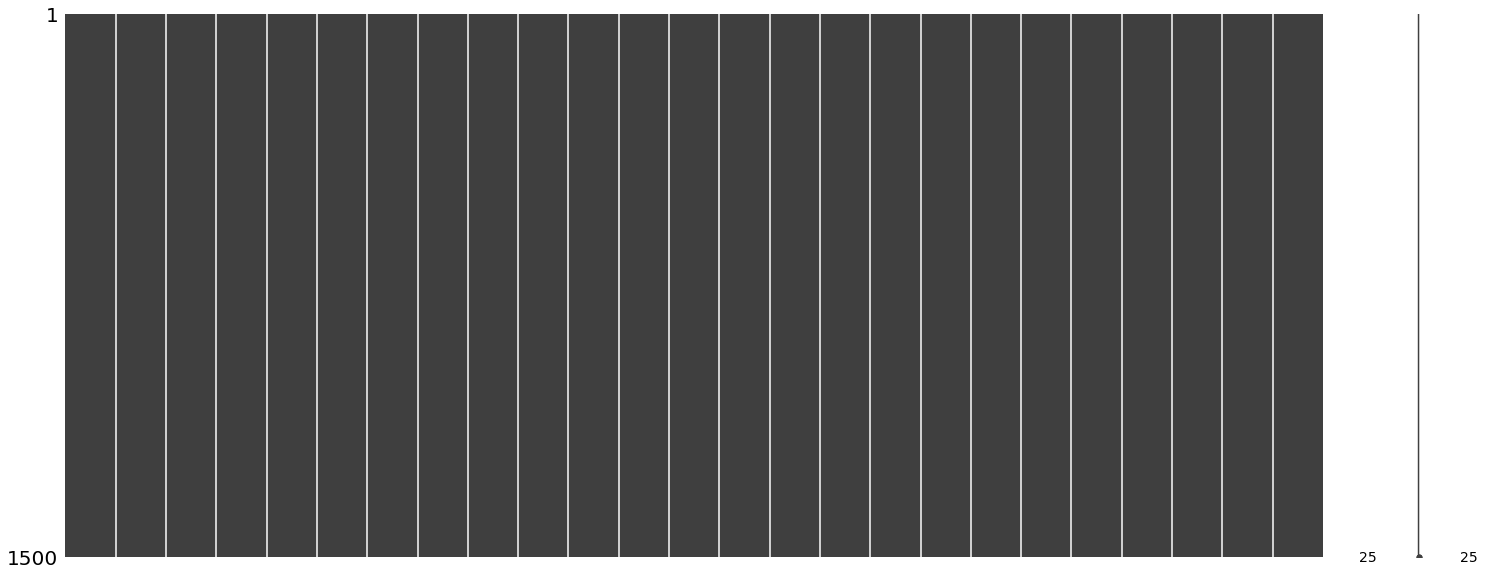

In [25]:
msno.matrix(data_sel)